
# Estadística de pozos

Analisis estadistico de historico de pozos

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import os
import scipy
import scipy.stats
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
%matplotlib inline

import timeit

In [2]:
pd.set_option('display.max_rows', 100_000_000)
pd.set_option('display.max_columns', 100_000_000)
pd.set_option('display.width', 1_000)
pd.set_option('precision', 2)
pd.options.display.float_format = '{:,.2f}'.format

In [3]:
import timeit
tic=timeit.default_timer()
toc=timeit.default_timer()
toc - tic #elapsed time in seconds

4.339999999913857e-05

<div class="alert alert-block alert-danger">

### <b>Check Harmonic Equation</b>
<br>
· b should be = 1, check bounds argument in harmonic_equation
<br>
· automate unique_well_list generation
<br>

</div>

In [4]:
def input_pozos(x): 
        
        global pozos
        pozos = pd.DataFrame(columns=["Campo",
                                      "Coordenadas",
                                      "Qo aceite",
                                      "Qo gas"])

        #parts=int(input("Numero de campos: "))
        parts = x

        # !!!!!! Verificar resultado de la funcion format... cambiar a integer
        
        for i in range(parts):
            campo = input("Nombre de Campo: ")
            coordenadas = input("Coordenadas: ".format(campo))
            Qo_aceite = input("Qo aceite: ".format(campo))
            Qo_gas = input("Qo gas: ".format(campo))
            df1 = pd.DataFrame(data=[[campo,coordenadas,Qo_aceite,Qo_gas]],columns=["Campo",
                                                                                    "Coordenadas",
                                                                                    "Qo aceite",
                                                                                    "Qo gas"])
            pozos = pd.concat([pozos,df1], axis=0)

        pozos.index = range(len(pozos.index))

In [5]:
%pwd

'C:\\Users\\elias\\OneDrive\\Documentos\\GitHub\\Ainda\\Proyecto Newton\\02_productividad'

## Estadistica - Kumaza

,Unnamed: 0,fecha,campo,yacimiento,plataforma,pozo,inicio_produccion_aceite,ultima_produccion_aceite,gasto_aceite_Mbd,gasto_agua_Mbd,gasto_gas_MMpcd,gasto_gas_BN_MMpcd,RGA_m3/m3,aceite_acumulado_MMb,agua_acumulada_MMb,gas_acumulado_MMMpc,cima_intervalo_mvbnm,base_intervalo_mvbnm,distancia_superior_intervalo_a_contacto_gas-aceite_(m),fluyente_BEC_o _BN,RGA_pc/bl,nivel_CGA,cima_mv -nivel_CGA,estatus,arriba_abajo_CGA,campo_yacimiento,first_oil,Dias Produciendo,days_online,Exponential_Predicted,Hyperbolic_Predicted,Harmonic_Predicted
0,0,2016-01-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/01/16,1.22,0.01,2.30,1.79,nan,9.93,0.13,5.87,"2,585.00","2,603.00",-,BN,"1,889.96",2919.2,-334.2,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,0,0,1.22,0.60,0.61
1,178,2016-02-29,KU,KU_CCE,KU-A,KU-10,02/28/86,29/02/16,0.15,0.01,0.28,0.40,331.05,9.93,0.13,5.87,"2,585.00","2,603.00",-,BN,"1,858.69",2924.518217,-339.518217,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,29,29,0.00,0.60,0.60
2,357,2016-03-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/03/16,0.44,0.10,0.90,2.05,367.06,9.94,0.14,5.90,"2,585.00","2,603.00",-,BN,"2,060.87",2918.6,-333.6,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,60,60,0.00,0.59,0.59
3,538,2016-04-30,KU,KU_CCE,KU-A,KU-10,02/28/86,30/04/16,0.44,0.03,0.97,1.81,389.10,9.96,0.14,5.93,"2,585.00","2,603.00",-,BN,"2,184.62",2918.6,-333.6,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,90,90,0.00,0.59,0.59
4,719,2016-05-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/05/16,0.45,0.07,0.98,2.61,388.96,9.97,0.14,5.96,"2,585.00","2,603.00",-,BN,"2,183.85",2923.5,-338.5,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,121,121,0.00,0.58,0.58


Index(['Unnamed: 0', 'fecha', 'campo', 'yacimiento', 'plataforma', 'pozo', 'inicio_produccion_aceite', 'ultima_produccion_aceite', 'gasto_aceite_Mbd', 'gasto_agua_Mbd', 'gasto_gas_MMpcd', 'gasto_gas_BN_MMpcd', 'RGA_m3/m3', 'aceite_acumulado_MMb', 'agua_acumulada_MMb', 'gas_acumulado_MMMpc', 'cima_intervalo_mvbnm', 'base_intervalo_mvbnm', 'distancia_superior_intervalo_a_contacto_gas-aceite_(m)', 'fluyente_BEC_o _BN', 'RGA_pc/bl', 'nivel_CGA', 'cima_mv -nivel_CGA', 'estatus', 'arriba_abajo_CGA', 'campo_yacimiento', 'first_oil', 'Dias Produciendo', 'days_online', 'Exponential_Predicted', 'Hyperbolic_Predicted', 'Harmonic_Predicted'], dtype='object')

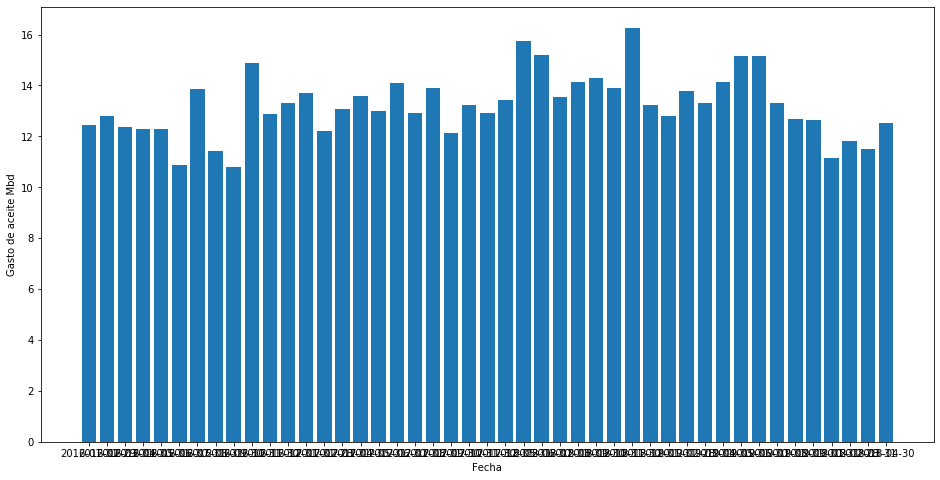

In [7]:
df=pd.read_csv(r'C:/Users/elias/Google Drive/python/csv/benchmark/kumaza_dca.csv',
               parse_dates=True)
display(df.head(),df.columns)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(df.fecha,df.gasto_aceite_Mbd)
ax.set_xlabel('Fecha')
ax.set_ylabel('Gasto de aceite Mbd')
plt.show()

## Dispersion Analysis

Wall time: 0 ns


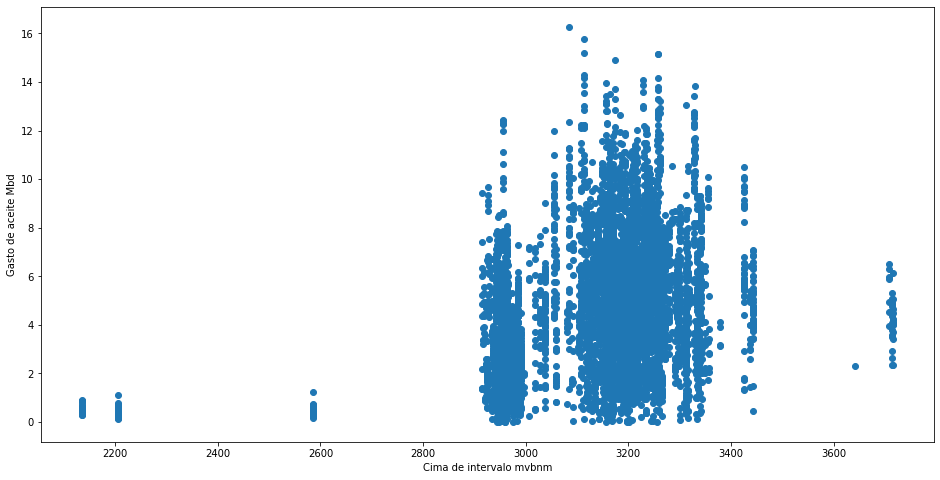

In [8]:
%time 

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['cima_intervalo_mvbnm'],df['gasto_aceite_Mbd'])
ax.set_xlabel('Cima de intervalo mvbnm')
ax.set_ylabel('Gasto de aceite Mbd')
plt.show()

Wall time: 0 ns


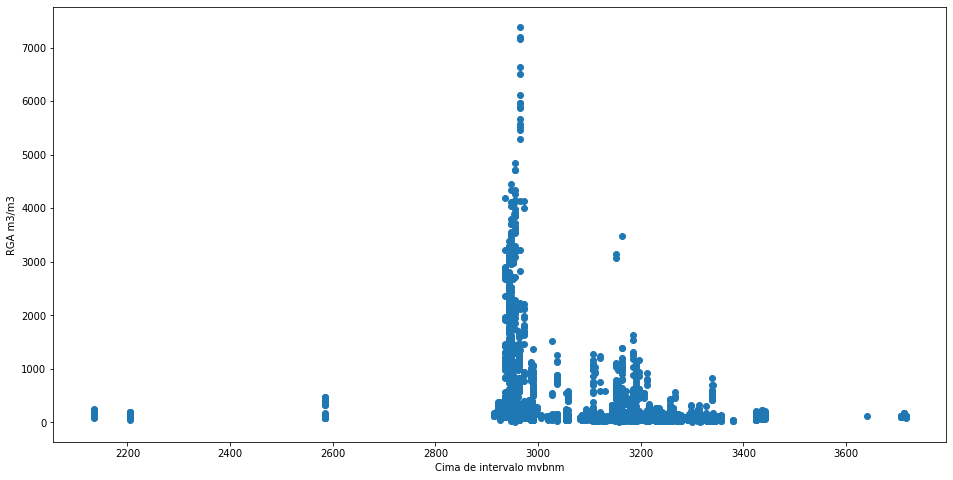

In [9]:
%time 

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(df['cima_intervalo_mvbnm'],df['RGA_m3/m3'] )
ax.set_xlabel('Cima de intervalo mvbnm')
ax.set_ylabel('RGA m3/m3')
plt.show()

In [10]:
df.columns

Index(['Unnamed: 0', 'fecha', 'campo', 'yacimiento', 'plataforma', 'pozo', 'inicio_produccion_aceite', 'ultima_produccion_aceite', 'gasto_aceite_Mbd', 'gasto_agua_Mbd', 'gasto_gas_MMpcd', 'gasto_gas_BN_MMpcd', 'RGA_m3/m3', 'aceite_acumulado_MMb', 'agua_acumulada_MMb', 'gas_acumulado_MMMpc', 'cima_intervalo_mvbnm', 'base_intervalo_mvbnm', 'distancia_superior_intervalo_a_contacto_gas-aceite_(m)', 'fluyente_BEC_o _BN', 'RGA_pc/bl', 'nivel_CGA', 'cima_mv -nivel_CGA', 'estatus', 'arriba_abajo_CGA', 'campo_yacimiento', 'first_oil', 'Dias Produciendo', 'days_online', 'Exponential_Predicted', 'Hyperbolic_Predicted', 'Harmonic_Predicted'], dtype='object')

In [11]:
to_plot=pd.DataFrame(df,columns=['fecha', 
                                 'campo',
                                 'pozo', 
                                 'gasto_aceite_Mbd',
                                 'gasto_agua_Mbd',
                                 'gasto_gas_MMpcd',
                                 'gasto_gas_BN_MMpcd',
                                 'RGA_m3/m3',
                                 'aceite_acumulado_MMb', 
                                 'agua_acumulada_MMb',
                                 'gas_acumulado_MMMpc',
                                 'cima_intervalo_mvbnm',
                                 'base_intervalo_mvbnm',
                                 'days_online', 
                                 'Exponential_Predicted', 
                                 'Hyperbolic_Predicted', 
                                 'Harmonic_Predicted'])

In [26]:
to_plot2=pd.DataFrame(df,columns=['fecha', 
                                 'campo',
                                 'pozo', 
                                 'gasto_aceite_Mbd',
                                 'cima_intervalo_mvbnm',
                                 'base_intervalo_mvbnm',
                                 'gasto_agua_Mbd',
                                 'gasto_gas_MMpcd',
                                 'gasto_gas_BN_MMpcd',
                                 'days_online',
                                 'RGA_m3/m3',])

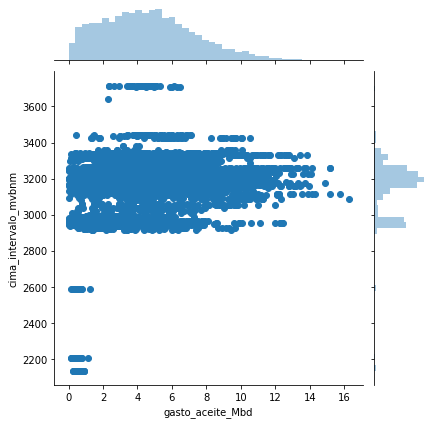

In [29]:
sns.jointplot(to_plot2.gasto_aceite_Mbd,to_plot2.cima_intervalo_mvbnm)

C:\Users\elias\Anaconda\lib\site-packages\numpy\lib\histograms.py:824: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\elias\Anaconda\lib\site-packages\numpy\lib\histograms.py:825: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


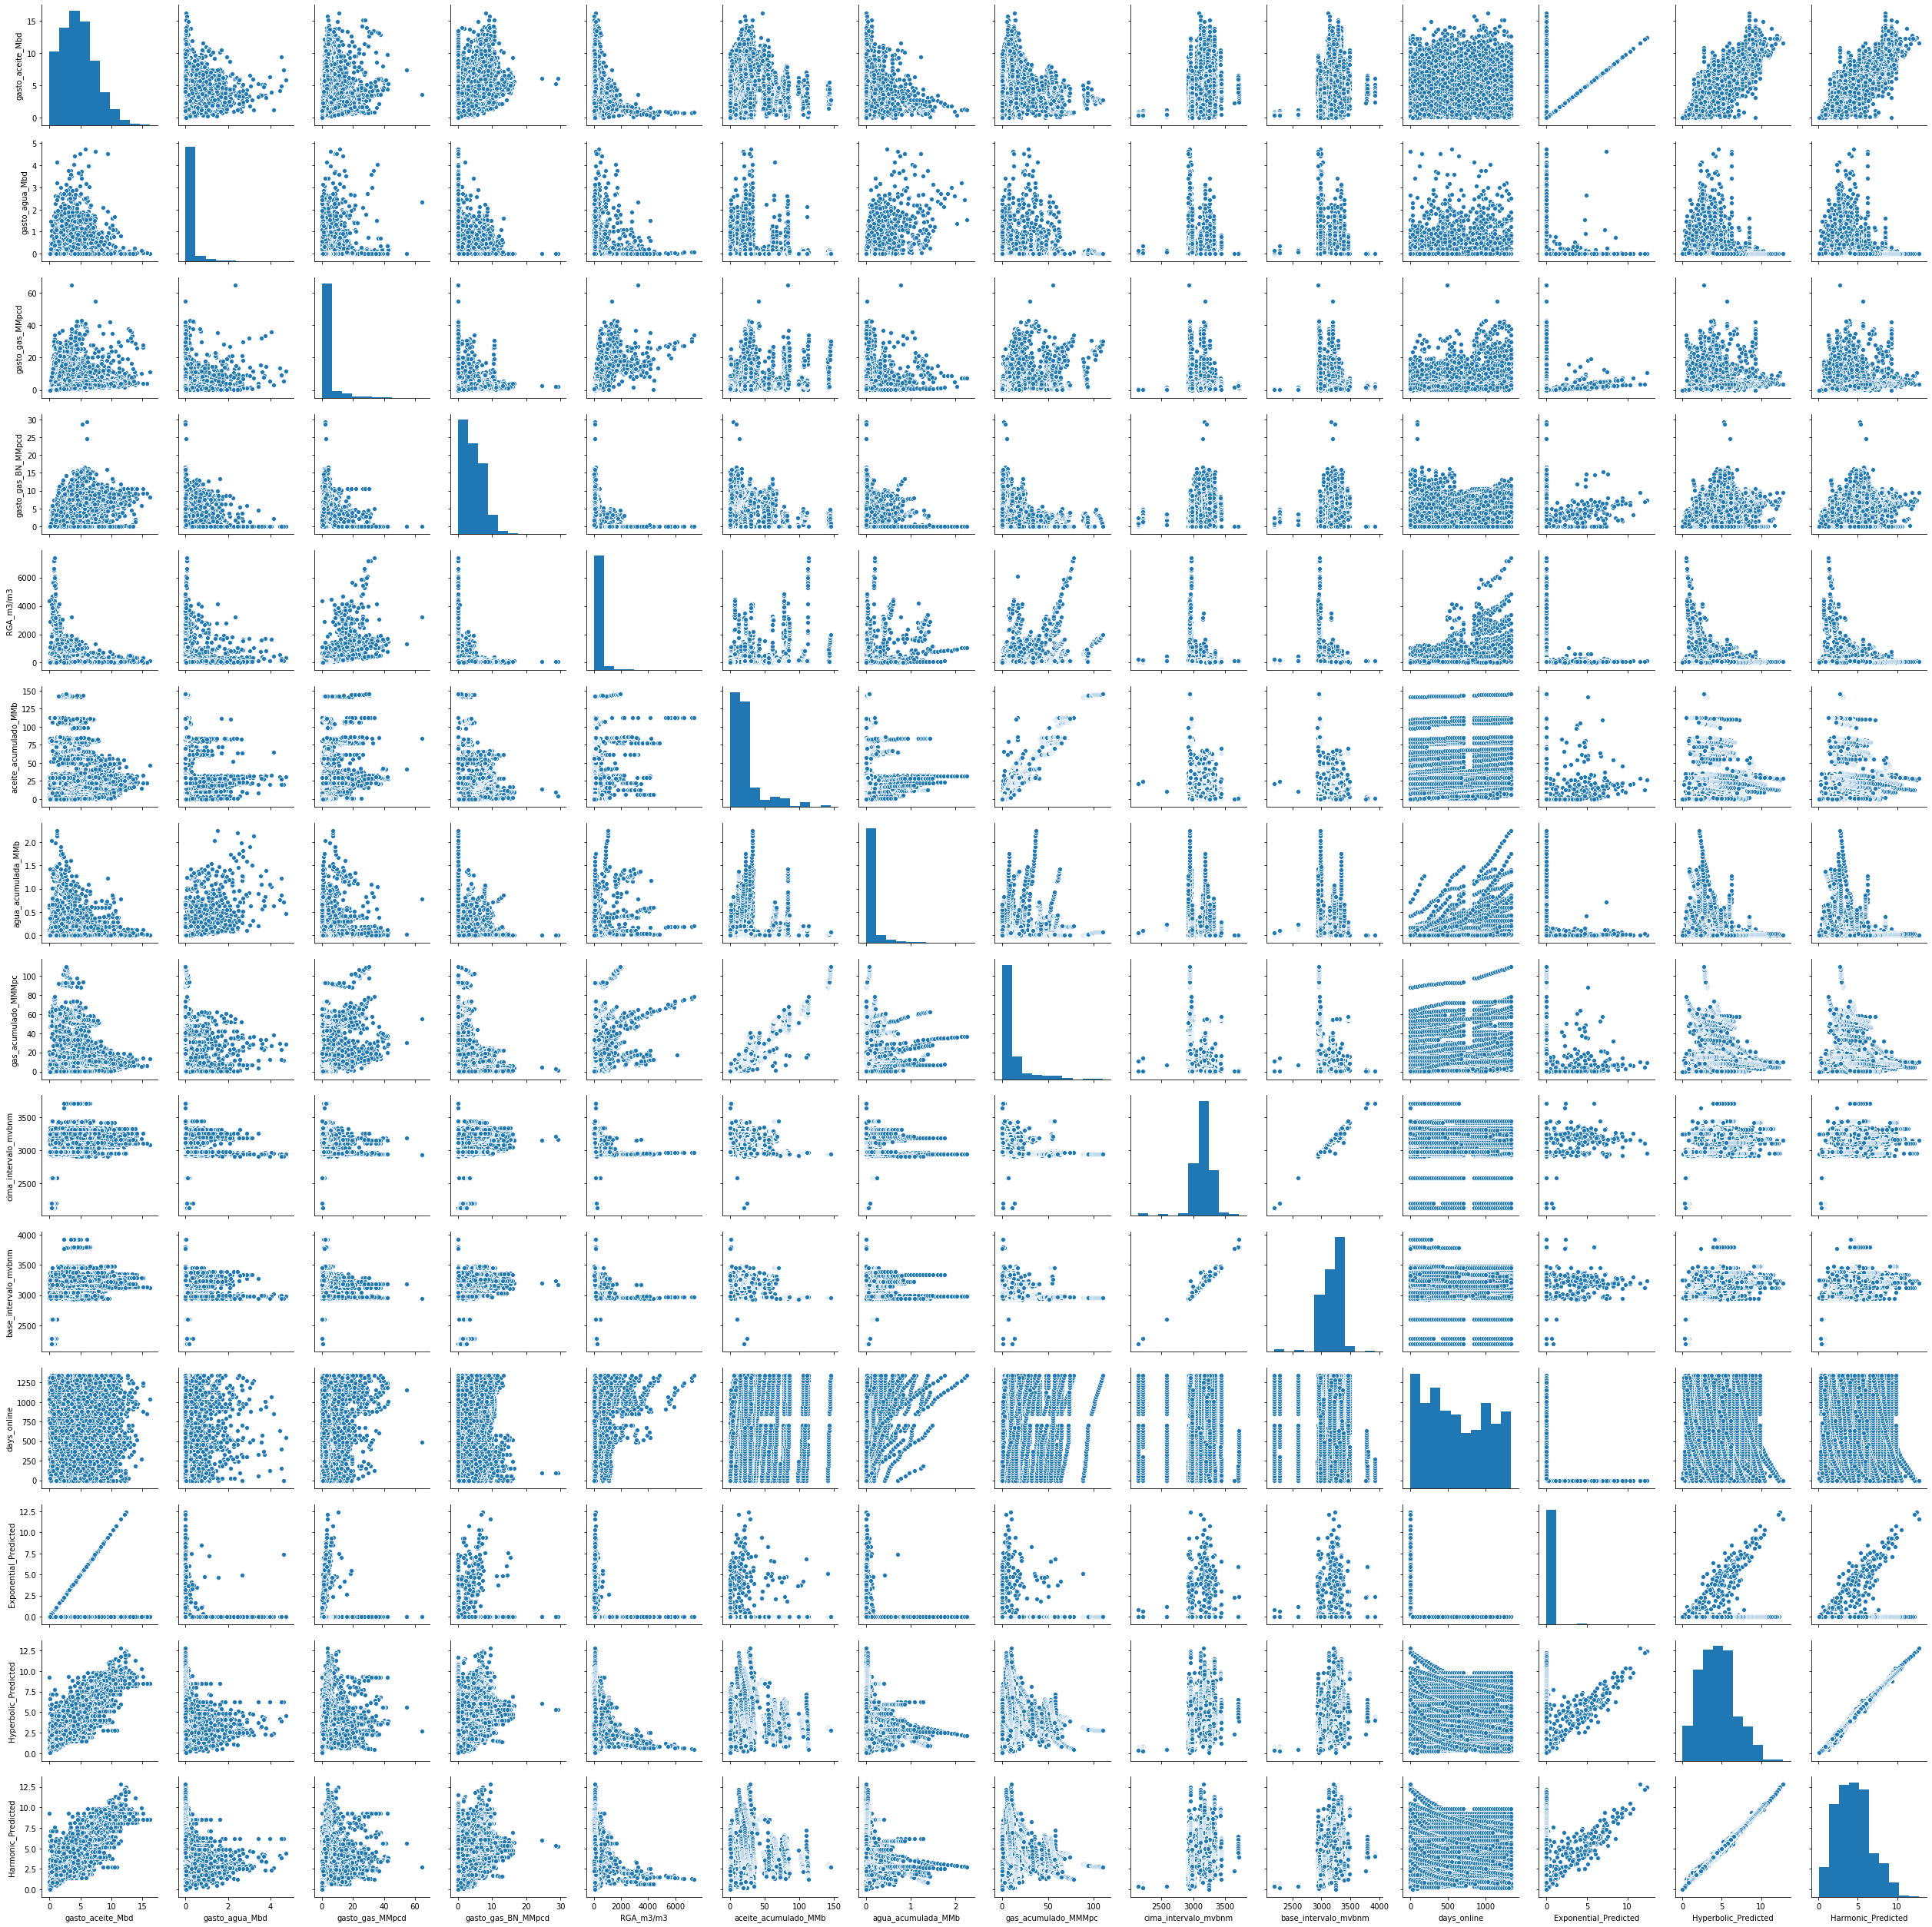

In [14]:
sns.pairplot(to_plot)

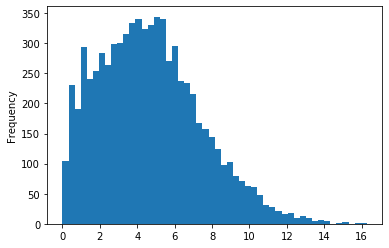

In [16]:
df.gasto_aceite_Mbd.plot.hist(bins=50)

In [17]:
display(df.head(),df.shape)
unique_well_list=pd.unique(list(df.pozo))
display(unique_well_list.shape, len(unique_well_list))

,Unnamed: 0,fecha,campo,yacimiento,plataforma,pozo,inicio_produccion_aceite,ultima_produccion_aceite,gasto_aceite_Mbd,gasto_agua_Mbd,gasto_gas_MMpcd,gasto_gas_BN_MMpcd,RGA_m3/m3,aceite_acumulado_MMb,agua_acumulada_MMb,gas_acumulado_MMMpc,cima_intervalo_mvbnm,base_intervalo_mvbnm,distancia_superior_intervalo_a_contacto_gas-aceite_(m),fluyente_BEC_o _BN,RGA_pc/bl,nivel_CGA,cima_mv -nivel_CGA,estatus,arriba_abajo_CGA,campo_yacimiento,first_oil,Dias Produciendo,days_online,Exponential_Predicted,Hyperbolic_Predicted,Harmonic_Predicted
0,0,2016-01-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/01/16,1.22,0.01,2.30,1.79,nan,9.93,0.13,5.87,"2,585.00","2,603.00",-,BN,"1,889.96",2919.2,-334.2,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,0,0,1.22,0.60,0.61
1,178,2016-02-29,KU,KU_CCE,KU-A,KU-10,02/28/86,29/02/16,0.15,0.01,0.28,0.40,331.05,9.93,0.13,5.87,"2,585.00","2,603.00",-,BN,"1,858.69",2924.518217,-339.518217,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,29,29,0.00,0.60,0.60
2,357,2016-03-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/03/16,0.44,0.10,0.90,2.05,367.06,9.94,0.14,5.90,"2,585.00","2,603.00",-,BN,"2,060.87",2918.6,-333.6,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,60,60,0.00,0.59,0.59
3,538,2016-04-30,KU,KU_CCE,KU-A,KU-10,02/28/86,30/04/16,0.44,0.03,0.97,1.81,389.10,9.96,0.14,5.93,"2,585.00","2,603.00",-,BN,"2,184.62",2918.6,-333.6,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,90,90,0.00,0.59,0.59
4,719,2016-05-31,KU,KU_CCE,KU-A,KU-10,02/28/86,31/05/16,0.45,0.07,0.98,2.61,388.96,9.97,0.14,5.96,"2,585.00","2,603.00",-,BN,"2,183.85",2923.5,-338.5,OPERANDO,ARRIBA,Ku-Crétacico,2016-01-31,121,121,0.00,0.58,0.58


(7328, 32)

(222,)

222

count   7,328.00
mean        4.66
std         2.72
min         0.00
25%         2.57
50%         4.46
75%         6.37
max        16.27
Name: gasto_aceite_Mbd, dtype: float64

0.10   1.20
0.50   4.46
0.90   8.36
Name: gasto_aceite_Mbd, dtype: float64

count   7,328.00
mean        4.45
std         2.23
min         0.03
25%         2.77
50%         4.30
75%         5.74
max        12.80
Name: Hyperbolic_Predicted, dtype: float64

0.10   1.70
0.50   4.30
0.90   7.53
Name: Hyperbolic_Predicted, dtype: float64

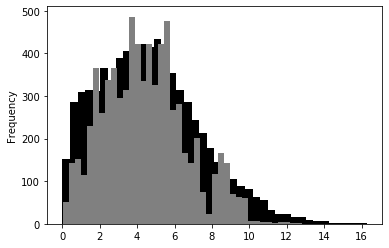

In [18]:
display(df.gasto_aceite_Mbd.describe(),
        df.gasto_aceite_Mbd.quantile([.1,.5,.9]),
        df.Hyperbolic_Predicted.describe(),
        df.Hyperbolic_Predicted.quantile([.1,.5,.9]))
df.gasto_aceite_Mbd.plot.hist(bins=40,color='black'),
df.Hyperbolic_Predicted.plot.hist(bins=40,color='gray')

count   7,328.00
mean        3.66
std         5.25
min         0.00
25%         1.24
50%         2.12
75%         3.52
max        64.57
Name: gasto_gas_MMpcd, dtype: float64

0.10   0.65
0.50   2.12
0.90   7.48
Name: gasto_gas_MMpcd, dtype: float64

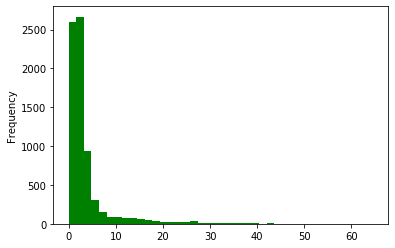

In [19]:
display(df.gasto_gas_MMpcd.describe(),
       df.gasto_gas_MMpcd.quantile([.1,.5,.9]))
df.gasto_gas_MMpcd.plot.hist(bins=40,color='green')

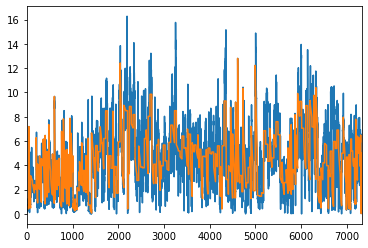

In [20]:
df.gasto_aceite_Mbd.plot()
df.Hyperbolic_Predicted.plot()

In [21]:
class Distribution(object):
    
    def __init__(self,dist_names_list = []):
        self.dist_names = ['beta',
                            'expon',
                            'gamma',
                            'lognorm',
                            'norm',
                            'pearson3',
                            'triang',
                            'uniform',
                            'weibull_min', 
                            'weibull_max']
        self.dist_results = []
        self.params = {}
        
        self.DistributionName = ""
        self.PValue = 0
        self.Param = None
        
        self.isFitted = False
        
        
    def Fit(self, y):
        self.dist_results = []
        self.params = {}
        for dist_name in self.dist_names:
            dist = getattr(scipy.stats, dist_name)
            param = dist.fit(y)
            
            self.params[dist_name] = param
            #Applying the Kolmogorov-Smirnov test
            D, p = scipy.stats.kstest(y, dist_name, args=param);
            self.dist_results.append((dist_name,p))
        #select the best fitted distribution
        sel_dist,p = (max(self.dist_results,key=lambda item:item[1]))
        #store the name of the best fit and its p value
        self.DistributionName = sel_dist
        self.PValue = p
        
        self.isFitted = True
        return self.DistributionName,self.PValue
    
    def Random(self, n = 1):
        if self.isFitted:
            dist_name = self.DistributionName
            param = self.params[dist_name]
            #initiate the scipy distribution
            dist = getattr(scipy.stats, dist_name)
            return dist.rvs(*param[:-2], loc=param[-2], scale=param[-1], size=n)
        else:
            raise ValueError('Must first run the Fit method.')
            
    def Plot(self,y):
        x = self.Random(n=len(y))
        fig, ax = plt.subplots(figsize=(16,8))
        plt.hist(x, alpha=0.5, label='Fitted',bins=50)
        plt.hist(y, alpha=0.5, label='Actual',bins=50)
        plt.legend(loc='upper right')

# Estadística CAMPOS

In [ ]:
import timeit
tic=timeit.default_timer()

mx_stats=pd.read_csv(r'/Users/elias/Google Drive/python/csv/benchmark/mexico/pozos/mx_benchmark.csv',
                    low_memory=False)

display(mx_stats.shape)

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

In [42]:
input_campo = input("Nombre de Campo: ")

Nombre de Campo: CANTARELL


In [43]:
import timeit
tic=timeit.default_timer()

selected_rows=mx_stats.pozo.str.contains(str(input_campo))
campo=mx_stats.loc[selected_rows]

unique_well_list=pd.unique(campo['pozo'])

display('Número de pozos en:',
        input_campo,
        len(unique_well_list),
        unique_well_list,
        campo.shape)


toc=timeit.default_timer()
toc - tic #elapsed time in seconds

'Número de pozos en:'

'CANTARELL'

467

array(['CANTARELL-1A', 'CANTARELL-6A', 'CANTARELL-94A', 'CANTARELL-3',
       'CANTARELL-74', 'CANTARELL-2031', 'CANTARELL-7A', 'CANTARELL-51',
       'CANTARELL-57A', 'CANTARELL-78', 'CANTARELL-11', 'CANTARELL-71',
       'CANTARELL-19', 'CANTARELL-8', 'CANTARELL-2011D', 'CANTARELL-2073',
       'CANTARELL-77A', 'CANTARELL-1084', 'CANTARELL-2032',
       'CANTARELL-28', 'CANTARELL-5', 'CANTARELL-66A', 'CANTARELL-73A',
       'CANTARELL-22', 'CANTARELL-2071', 'CANTARELL-26', 'CANTARELL-35',
       'CANTARELL-86', 'CANTARELL-14', 'CANTARELL-2075', 'CANTARELL-25',
       'CANTARELL-53', 'CANTARELL-68', 'CANTARELL-55', 'CANTARELL-24',
       'CANTARELL-64', 'CANTARELL-15', 'CANTARELL-2033', 'CANTARELL-31',
       'CANTARELL-79', 'CANTARELL-2097', 'CANTARELL-17', 'CANTARELL-229',
       'CANTARELL-59', 'CANTARELL-88', 'CANTARELL-2013', 'CANTARELL-39',
       'CANTARELL-46', 'CANTARELL-37', 'CANTARELL-48', 'CANTARELL-75',
       'CANTARELL-2035', 'CANTARELL-289', 'CANTARELL-97',
       'CAN

(64701, 10)

1.4970599070002208

In [44]:
import timeit
tic=timeit.default_timer()

display(campo.aceite_Mbd.quantile([.1,.5,.9]))
display(campo.describe())

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

0.10    0.62
0.50    6.30
0.90   14.12
Name: aceite_Mbd, dtype: float64

,Unnamed: 0,aceite_Mbd,agua_Mbd,condensado_Mbd,gas_asociado_MMpcd,gas_no_asociado_MMpcd
count,"64,701.00","64,701.00","64,701.00","64,701.00","64,701.00","64,701.00"
mean,"399,920.62",6.83,0.20,0.00,5.08,0.00
std,"150,082.80",5.41,0.64,0.00,6.81,0.00
min,"108,528.00",0.00,0.00,0.00,0.00,0.00
25%,"276,496.00",1.94,0.00,0.00,1.87,0.00
50%,"398,895.00",6.30,0.00,0.00,3.23,0.00
75%,"510,715.00",9.91,0.01,0.00,5.26,0.00
max,"714,184.00",33.73,13.27,0.00,132.66,0.00


0.10668300100041961

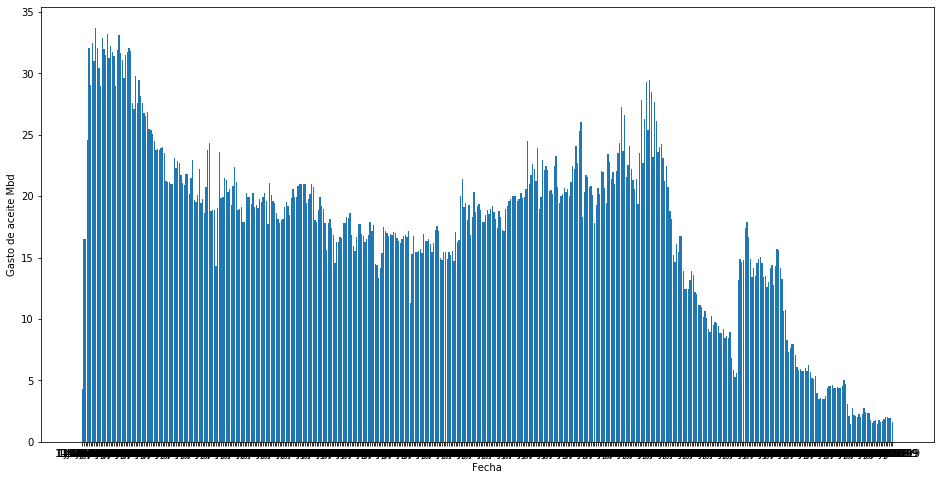

1687.2183525479995

In [45]:
import timeit
tic=timeit.default_timer()

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(campo.fecha,campo.aceite_Mbd)
ax.set_xlabel('Fecha')
ax.set_ylabel('Gasto de aceite Mbd')
plt.show()

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

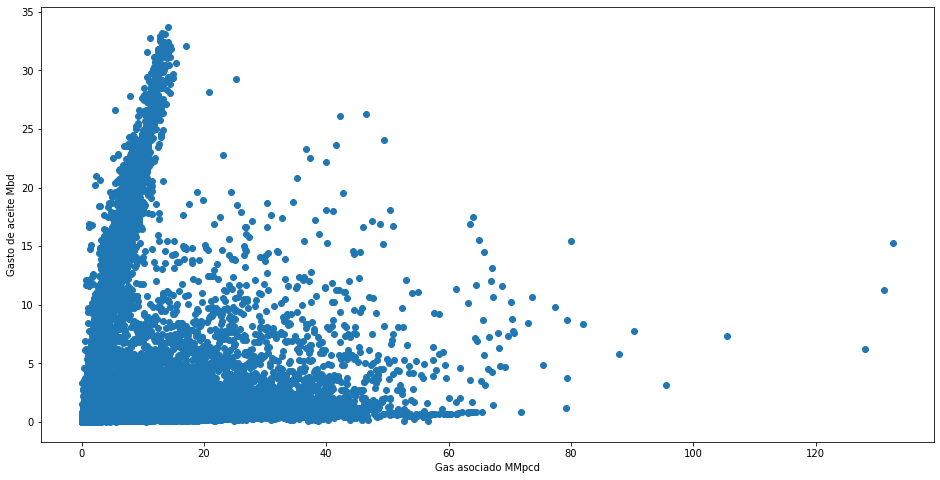

0.6657220859997324

In [46]:
import timeit
tic=timeit.default_timer()

fig, ax = plt.subplots(figsize=(16,8))
ax.scatter(campo.gas_asociado_MMpcd,campo.aceite_Mbd)
ax.set_xlabel('Gas asociado MMpcd')
ax.set_ylabel('Gasto de aceite Mbd')
plt.show()


toc=timeit.default_timer()
toc - tic #elapsed time in seconds

0.09217951300070126

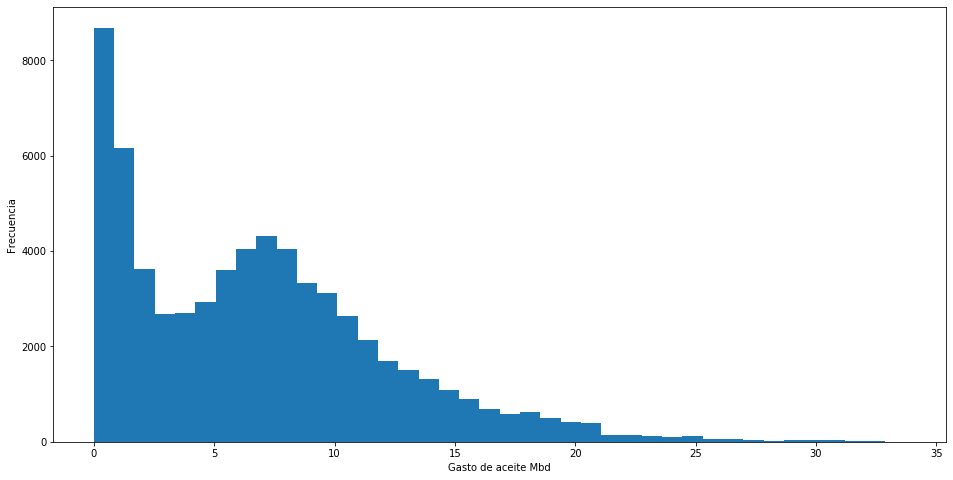

In [47]:
import timeit
tic=timeit.default_timer()

fig, ax = plt.subplots(figsize=(16,8))
ax.hist(campo.aceite_Mbd,
        bins=40,
        cumulative=False,
        density=False)
ax.set_xlabel('Gasto de aceite Mbd')
ax.set_ylabel('Frecuencia')

toc=timeit.default_timer()
toc - tic #elapsed time in seconds

('beta', 7.653139821664782e-291)

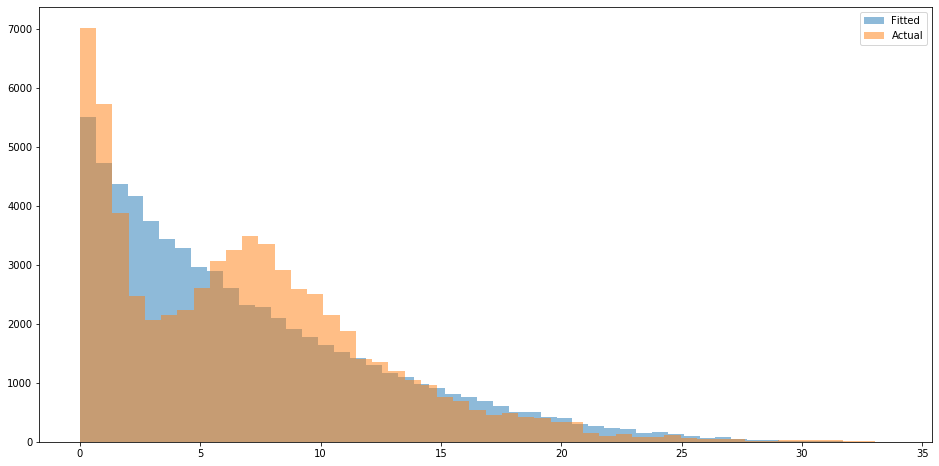

In [48]:
dst=Distribution()
display(dst.Fit(campo.aceite_Mbd))
dst.Plot(campo.aceite_Mbd)

## Q inicial

In [20]:
def get_max_initial_production(df, variable_column, well_column, date_column):
    global df_beginning_production
    global field
    """
    This function allows you to look at the first X months of production, and selects 
    the highest production month as max initial production
    Arguments:
        df: Pandas dataframe. 
        number_first_months: float. Number of months from the point the well comes online
        to compare to get the max initial production rate qi (this looks at multiple months
        in case there is a production ramp-up)
        variable_column: String. Column name for the column where we're attempting to get
        the max volume from (can be either 'Gas' or 'Oil' in this script)
        date_column: String. Column name for the date that the data was taken at 
    """
    #First, sort the data frame from earliest to most recent prod date
    field=campo.sort_values(by=[date_column,well_column])
    num_months=int((len(field))*.20)
    #Pull out the first x months of production, where number_first_months is x
    df_beginning_production=field.head(num_months)
    #Return the max value in the selected variable column from the newly created 
    #df_beginning_production df
    return df_beginning_production[variable_column].max(), num_months, field.shape

In [ ]:
get_max_initial_production(campo,'aceite_Mbd','pozo','fecha')

In [ ]:
df_beginning_production.shape

In [ ]:
for unique_well_list in field:
    display(get_max_initial_production)

# Definir funcion para carga

In [40]:
def estadistica_campo():
    global campo
    global unique_well_list
    
    tic=timeit.default_timer()
    
    mx_stats=pd.read_csv(r'/Users/fffte/ainda_drive/python/csv/benchmark/mexico/pozos/mx_benchmark.csv',
                        low_memory=False)

    display(mx_stats.shape)
    
    input_campo = input("Nombre de Campo: ")
    
    selected_rows=mx_stats.pozo.str.contains(str(input_campo))
    campo=mx_stats.loc[selected_rows]

    display(campo.head(),campo.shape)
    unique_well_list=pd.unique(campo['pozo'])
    display(unique_well_list.shape, len(unique_well_list))
    display(unique_well_list)

    campo.describe()
    display(campo.aceite_Mbd.quantile([.1,.5,.9]))

    fig1, ax1 = plt.subplots(figsize=(16,8))
    mx_stats
    ax1.bar(campo.fecha,campo.aceite_Mbd)
    ax1.set_xlabel('Fecha')
    ax1.set_ylabel('Gasto de aceite Mbd')
    plt.show()

    fig2, ax2 = plt.subplots(figsize=(16,8))
    ax2.scatter(campo.fecha,campo.aceite_Mbd)
    ax2.set_xlabel('Fecha')
    ax2.set_ylabel('Gasto de aceite Mbd')
    plt.show()

    fig3, ax3 = plt.subplots(figsize=(16,8))
    ax3.hist(campo.aceite_Mbd,
            bins=40,
            cumulative=False,
            density=False)
    ax3.set_xlabel('Gasto de aceite Mbd')
    ax3.set_ylabel('Frecuencia')
    

    dst=Distribution()
    display(dst.Fit(campo.aceite_Mbd))
    dst.Plot(campo.aceite_Mbd)
    
    toc=timeit.default_timer()
    toc - tic #elapsed time in seconds
    
    return toc - tic

(2838332, 10)

Nombre de Campo: JUJO


,Unnamed: 0,aceite_Mbd,agua_Mbd,asignacion,condensado_Mbd,cuenca,fecha,gas_asociado_MMpcd,gas_no_asociado_MMpcd,pozo
1021572,120096,0.92,0.00,NaN,0.00,Cuencas del Sureste,1-Oct-1980,0.85,0.00,JUJO-2A
1022311,120835,5.52,0.00,NaN,0.00,Cuencas del Sureste,1-Nov-1980,5.09,0.00,JUJO-2A
1023042,121566,12.85,0.00,NaN,0.00,Cuencas del Sureste,1-Dec-1980,12.26,0.00,JUJO-2A
1023780,122304,13.50,0.00,NaN,0.00,Cuencas del Sureste,1-Jan-1981,12.89,0.00,JUJO-2A
1024529,123053,13.39,0.00,NaN,0.00,Cuencas del Sureste,1-Feb-1981,15.19,0.00,JUJO-2A


(11494, 10)

(65,)

65

array(['JUJO-2A', 'JUJO-42', 'JUJO-34', 'JUJO-12', 'JUJO-3', 'JUJO-23A',
       'JUJO-16', 'JUJO-4', 'JUJO-25', 'JUJO-43', 'JUJO-14', 'JUJO-13A',
       'JUJO-26', 'JUJO-22A', 'JUJO-24', 'JUJO-6', 'JUJO-54', 'JUJO-32',
       'JUJO-45', 'JUJO-56', 'JUJO-27', 'JUJO-5', 'JUJO-14D', 'JUJO-47',
       'JUJO-38', 'JUJO-58', 'JUJO-18', 'JUJO-52', 'JUJO-89', 'JUJO-36A',
       'JUJO-67', 'JUJO-459', 'JUJO-69', 'JUJO-438', 'JUJO-65', 'JUJO-9',
       'JUJO-523', 'JUJO-121', 'JUJO-522', 'JUJO-532', 'JUJO-2B',
       'JUJO-504', 'JUJO-600', 'JUJO-521', 'JUJO-502A', 'JUJO-506',
       'JUJO-543', 'JUJO-542A', 'JUJO-654', 'JUJO-2C', 'JUJO-624',
       'JUJO-701', 'JUJO-524', 'JUJO-703', 'JUJO-852', 'JUJO-505',
       'JUJO-863', 'JUJO-552', 'JUJO-547', 'JUJO-652', 'JUJO-513A',
       'JUJO-52A', 'JUJO-612', 'JUJO-23B', 'JUJO-642A'], dtype=object)

0.10   0.13
0.50   1.19
0.90   6.06
Name: aceite_Mbd, dtype: float64

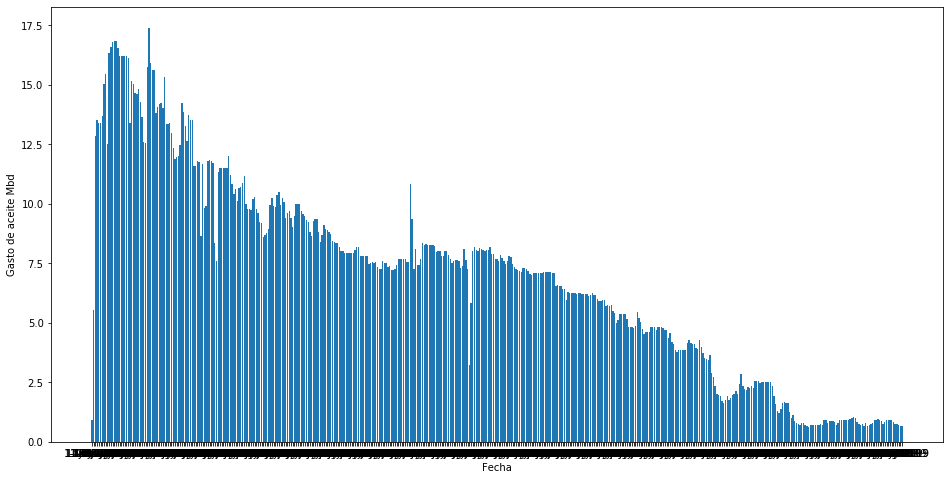

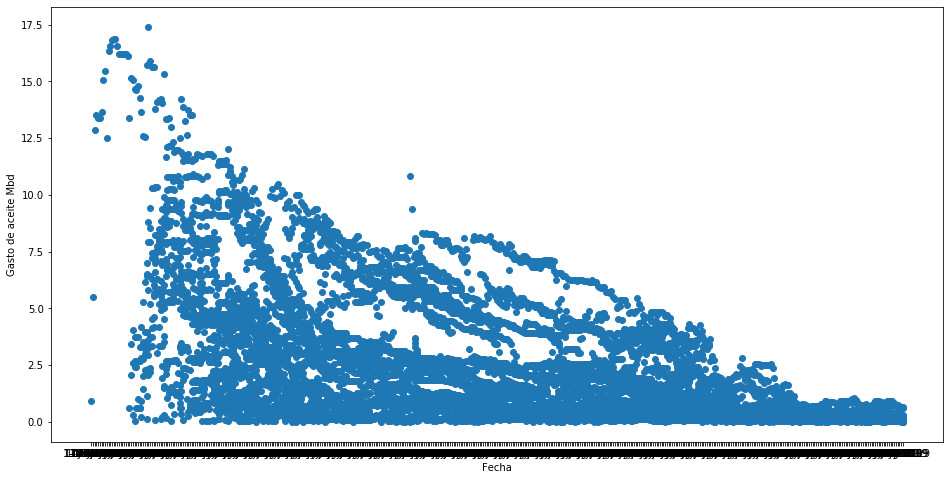

/opt/anaconda3/lib/python3.7/site-packages/scipy/stats/_continuous_distns.py:515: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


('pearson3', 1.266880818640124e-21)

176.95729027699986

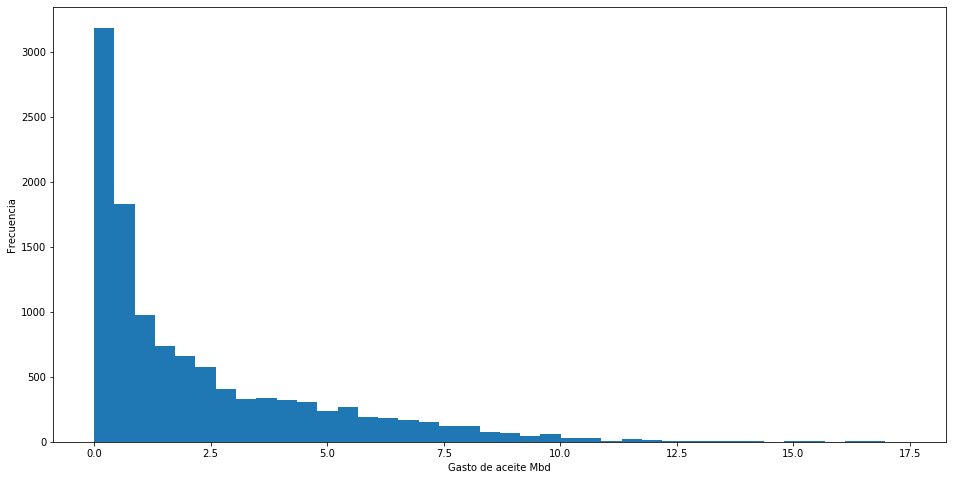

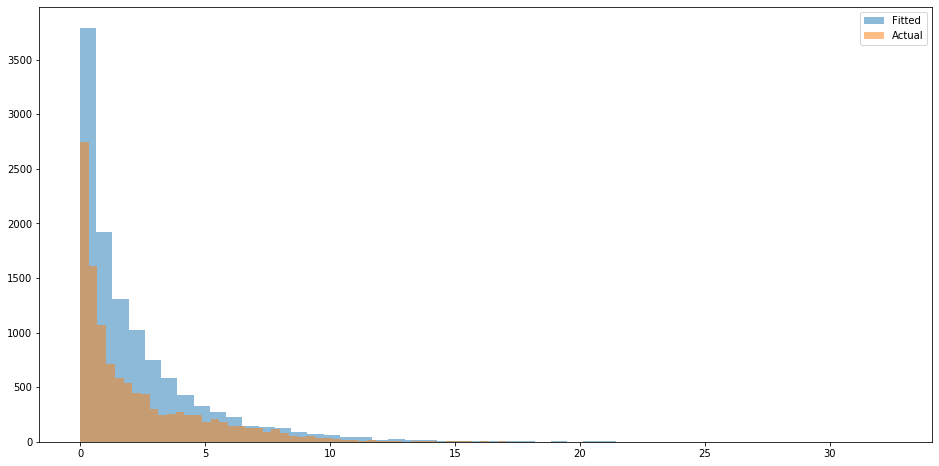

In [41]:
estadistica_campo()

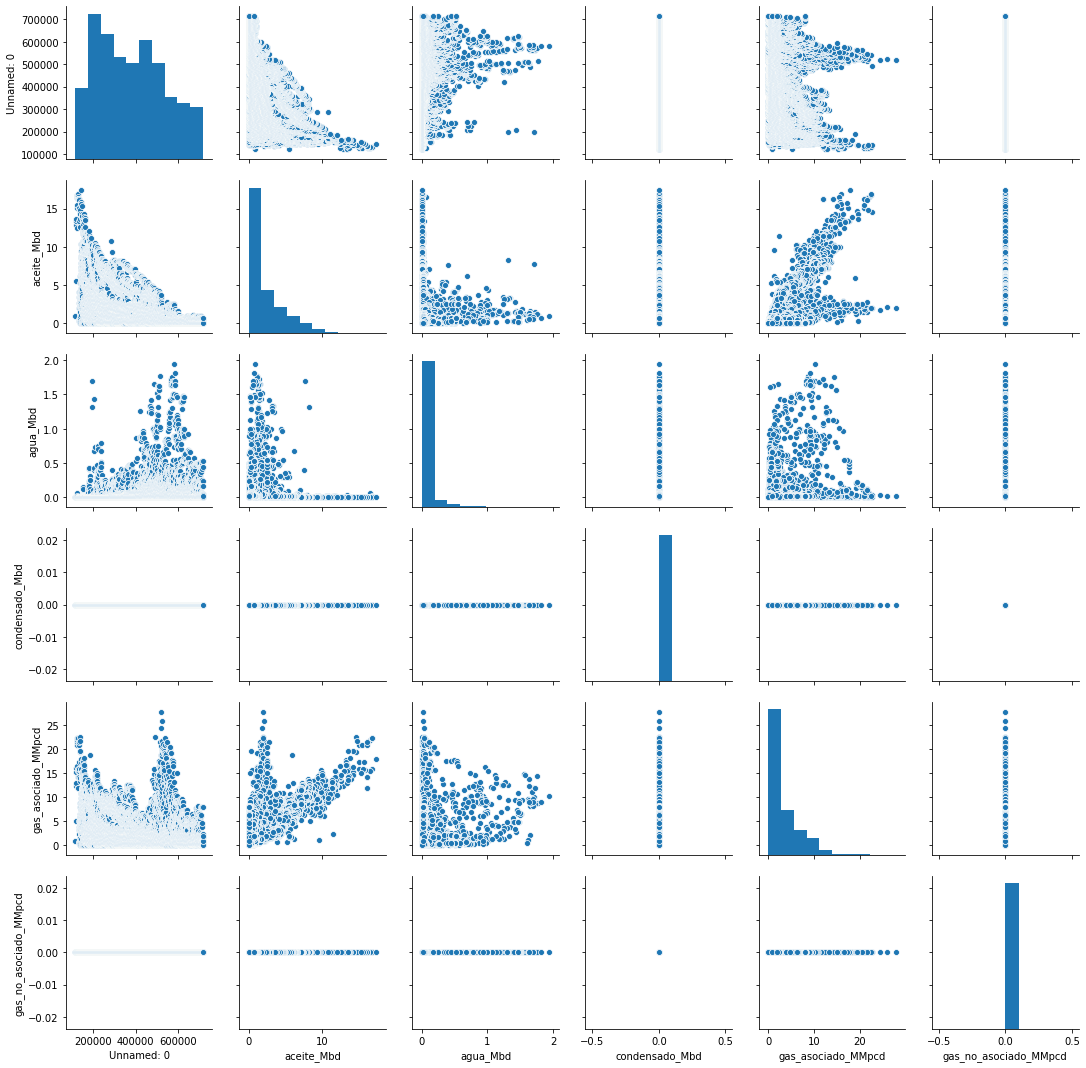

In [42]:
sns.pairplot(campo)

# DCA

In [ ]:
import timeit
tic=timeit.default_timer()

def read_in_csv(file_path):
    """
    Read in the specified csv as a pandas dataframe
    Arguments: 
        file_path: String. Path for the csv file that we want to read in
    Outputs:
        dataframe: Pandas dataframe.
    """
    well_data=pd.read_csv(file_path,parse_dates=True)
    return well_data

def remove_nan_and_zeroes_from_columns(df, variable):
    """
    This function cleans up a dataframe by removing rows in a specific 
    column that are null/NaN or equal to 0. This basically removes zero 
    production time periods.
    Arguments:
        df: Pandas dataframe.
        variable: String. Name of the column where we want to filter out
        NaN's or 0 values
    Output:
        filtered_df: Pandas dataframe. Dataframe with NaN's and zeroes filtered out of 
        the specified column
    """
    filtered_df = df[(df[variable].notnull()) & (df[variable]>0)]
    return filtered_df

def generate_time_delta_column(df, time_column, date_first_online_column):
    """
    Create column for the time that a well has been online at each reading, with 
    the first non-null month in the series listed as the start of production
    Arguments:
        df: Pandas dataframe
        time_column: String. Name of the column that includes the specific record date
        that the data was taken at. Column type is pandas datetime
        date_first_online_column: Name of the column that includes the date that the
        well came online. Column type is pandas datetime
    Outputs:
        Pandas series containing the difference in days between the date the well
        came online and the date that the data was recorded (cumulative days online)
    """
    df['Dias Produciendo']=(df[time_column]-df[date_first_online_column]).dt.days
    return (df[time_column]-df[date_first_online_column]).dt.days

def get_min_or_max_value_in_column_by_group(dataframe, group_by_column, calc_column, calc_type):
    global value
    """
    This function obtains the min or max value for a column, with a group by applied. For example,
    it could return the earliest (min) RecordDate for each API number in a dataframe 
    Arguments:
        dataframe: Pandas dataframe 
        group_by_column: string. Name of column that we want to apply a group by to
        calc_column: string. Name of the column that we want to get the aggregated max or min for
        calc_type: string; can be either 'min' or 'max'. Defined if we want to pull the min value 
        or the max value for the aggregated column
    Outputs:
        value: Depends on the calc_column type.
    """
    value=dataframe.groupby(group_by_column)[calc_column].transform(calc_type)
    return value

def get_max_initial_production(df, number_first_months, variable_column, date_column):
    global df_beginning_production
    """
    This function allows you to look at the first X months of production, and selects 
    the highest production month as max initial production
    Arguments:
        df: Pandas dataframe. 
        number_first_months: float. Number of months from the point the well comes online
        to compare to get the max initial production rate qi (this looks at multiple months
        in case there is a production ramp-up)
        variable_column: String. Column name for the column where we're attempting to get
        the max volume from (can be either 'Gas' or 'Oil' in this script)
        date_column: String. Column name for the date that the data was taken at 
    """
    #First, sort the data frame from earliest to most recent prod date
    df=df.sort_values(by=date_column)
    #Pull out the first x months of production, where number_first_months is x
    df_beginning_production=df.head(number_first_months)
    #Return the max value in the selected variable column from the newly created 
    #df_beginning_production df
    return df_beginning_production[variable_column].max()

def hyperbolic_equation(t, qi, b, di):
    """
    Hyperbolic decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        b: Float. Hyperbolic decline constant
        di: Float. Nominal decline rate at time t=0
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi/((1.0+b*di*t)**(1.0/b))

def exponential_equation(t, qi, di):
    """
    Exponential decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        di: Float. Nominal decline rate (constant)
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi*np.exp(-di*t)

def harmonic_equation (t, qi, di):
    """
    Harmonic decline curve equation
    Arguments:
        t: Float. Time since the well first came online, can be in various units 
        (days, months, etc) so long as they are consistent.
        qi: Float. Initial production rate when well first came online.
        di: Float. Nominal decline rate (constant)
    Output: 
        Returns q, or the expected production rate at time t. Float.
    """
    return qi/(1+(di*t))

def plot_actual_vs_predicted_by_equations(df, x_variable, y_variables, plot_title):
    """
    This function is used to map x- and y-variables against each other
    Arguments:
        df: Pandas dataframe.
        x_variable: String. Name of the column that we want to set as the 
        x-variable in the plot
        y_variables: string (single), or list of strings (multiple). Name(s) 
        of the column(s) that we want to set as the y-variable in the plot
    """
    #Plot results
    df.plot(x=x_variable, y=y_variables, title=plot_title,figsize=(10,5))
    plt.show()

def main(file_path):
    global well_data
    global production_time_series
    global results
    results=pd.DataFrame()
    #Read in the monthly oil and gas data
    #file_path=r'/Users/fffte/Documents/GitHub/Ainda/Proyecto Newton/02_productividad/kumaza_produccion.csv'
    well_data=read_in_csv(file_path)
    #Perform some data cleaning to get the columns as the right data type
    well_data['fecha']=pd.to_datetime(well_data['fecha'])
    #Declare the desired product that we want to curve fit for--it can either by 'Gas' or 'Oil'
    hydrocarbon='gasto_aceite_Mbd'
    #Remove all rows with null values in the desired time series column
    well_data=remove_nan_and_zeroes_from_columns(well_data, hydrocarbon)
    #Get a list of unique wells to loop through
    unique_well_list=pd.unique(list(well_data.pozo))
    #Get the earliest RecordDate for each Well
    well_data['inicio_produccion_aceite']= get_min_or_max_value_in_column_by_group(well_data, group_by_column='pozo', 
                  calc_column='fecha', calc_type='min')
    #Generate column for time online delta
    well_data['days_online']=generate_time_delta_column(well_data, time_column='fecha', 
                  date_first_online_column='inicio_produccion_aceite')
    #Pull data that came online between an specified range
    well_data_range=well_data[(well_data.fecha>='2016-01-01') & (well_data.fecha<='2019-12-01')]
    #Loop through each well, and perform calculations
    for pozo in unique_well_list:
        #Subset the dataframe by Well
        production_time_series=well_data_range[well_data_range.pozo==pozo]
        #Get the highest value of production in the first X months of production, to use as qi value
        qi=get_max_initial_production(production_time_series, 6, hydrocarbon, 'fecha')
        #Exponential curve fit the data to get best fit equation
        popt_exp, pcov_exp=curve_fit(exponential_equation, production_time_series['days_online'], 
                                     production_time_series[hydrocarbon],bounds=(0, [qi,10]))
        #print('Exponential Fit Curve-fitted Variables: qi='+str(popt_exp[0])+', di='+str(popt_exp[1]))
        #Hyperbolic curve fit the data to get best fit equation
        popt_hyp, pcov_hyp=curve_fit(hyperbolic_equation, production_time_series['days_online'], 
                                     production_time_series[hydrocarbon],bounds=(0, [qi,2,10]))
        #print('Hyperbolic Fit Curve-fitted Variables: qi='+str(popt_hyp[0])+', b='+str(popt_hyp[1])+', di='+str(popt_hyp[2]))
        #Harmonic curve fit the data to get best fit equation
        popt_harm, pcov_harm=curve_fit(harmonic_equation, production_time_series['days_online'], 
                                     production_time_series[hydrocarbon],bounds=(0, [qi,10]))
        #print('Harmonic Fit Curve-fitted Variables: qi='+str(popt_harm[0])+', b='+str(popt_harm[0])+', di='+str(popt_harm[1]))
        #Exponential fit results
        production_time_series.loc[:,'Exponential_Predicted']=exponential_equation(production_time_series['days_online'], 
                                  *popt_exp)
        #Hyperbolic fit results
        production_time_series.loc[:,'Hyperbolic_Predicted']=hyperbolic_equation(production_time_series['days_online'], 
                                  *popt_hyp)
        #Harmonic fit results
        production_time_series.loc[:,'Harmonic_Predicted']=harmonic_equation(production_time_series['days_online'], 
                                  *popt_harm)
        
        results=results.append(production_time_series)
        #Declare the x- and y- variables that we want to plot against each other
        y_variables=[hydrocarbon, "Hyperbolic_Predicted", "Exponential_Predicted","Harmonic_Predicted"]
        x_variable='days_online'
        #Create the plot title
        plot_title=hydrocarbon+' for '+str(pozo)
        #Plot the data to visualize the equation fit
        #plot_actual_vs_predicted_by_equations(production_time_series, x_variable, y_variables, plot_title)
                
if __name__== "__main__":
    main(r'C:\Users\elias\Google Drive\python\csv\benchmark\kumaza_produccion.csv')

toc=timeit.default_timer()
toc - tic #elapsed time in seconds